## **HBO**

### 1. Exploración y Preparación de los Datos

Datos descargados de Kaggle

(Mismo código en todos los notebooks de datos)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


1.1 Visual general de los datos

In [2]:
data_hbo = pd.read_csv('../src:data/Data_hbo/datos_hbo.csv')

print("Filas, columnas:", data_hbo.shape)
data_hbo.head()

Filas, columnas: (3294, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8


In [3]:
# Tipo de dato
data_hbo.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [4]:
# Missings

data_hbo.isna().sum()

id                         0
title                      0
type                       0
description               12
release_year               0
age_certification       1208
runtime                    0
genres                     0
production_countries       0
seasons                 2538
imdb_id                  326
imdb_score               372
imdb_votes               383
tmdb_popularity           33
tmdb_score               268
dtype: int64

In [5]:
#Nulls en porcentaje
for i in data_hbo.isna().sum():
    print((i/data_hbo.shape[0])*100)

#Destacamos que el 77% de los valores de la columna season son nulos, pero como representan el numero de temporadas, no nos importa mucho, y podría tener sentido

0.0
0.0
0.0
0.36429872495446264
0.0
36.67273831208257
0.0
0.0
0.0
77.04918032786885
9.89678202792957
11.293260473588344
11.627200971463267
1.0018214936247722
8.136004857316333


<AxesSubplot:>

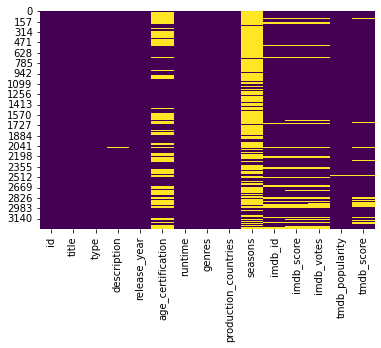

In [6]:
sns.heatmap(data_hbo.isnull(),cbar=False,cmap='viridis')

1.2. Columnas

- ID: ID del título en JustWatch

- title: nombre del título

- show type: SHOW o MOVIE - diferenciación entre pelicula o serie

- description: breve descripción

- release year: año de estreno

- age certification: orientacion a padres de edad mínima recomendada

- runtime: duración

- genres: lista de géneros

- production countries: lista de países que produjeron el título

- seasons: número de temporadas

- IMDB ID: ID del título en IMDB

- IMDB Score: puntuación en IMDB

- IMDB Votes: votos en IMDB

- TMDB Score: puntuación en TMDB

- TMDB Popularity: popularidad en TMDB

    La métrica de popularidad de TMDB se mide -diariamente- en función de los parámetros:
    - N de votos al día
    - N vistas de pág al día    
    - N usuarios que marcan el título como favorito    
    - Fecha de estreno +  fecha de emisión del último/nuevo episodio    
    - N total de votos
    - Puntuación de los días anteriores

In [7]:
print(data_hbo.columns)
print("N columnas:", len(data_hbo.columns))

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
N columnas: 15


In [8]:
# Título
# Cada título representa un contenido 'único' de la plataforma
# Comprobamos que no haya duplicados (ya sabemos que no hay nulos)

print('Tipo de dato:', data_hbo['title'].dtype)
titulos_duplicados = data_hbo.loc[data_hbo.duplicated(['title'])]
print("n titulos duplicados:", titulos_duplicados.shape[0])
titulos_unicos = data_hbo['title'].nunique()
print("valores repetidos:", data_hbo.shape[0] - titulos_unicos)

Tipo de dato: object
n titulos duplicados: 31
valores repetidos: 31


In [9]:
# Tenemos 31 titulos duplicados, pero esto no indica que sean la misma película/serie
# Comprobamos duplicados que coincidan en título, tipo de contenido, año de estreno y duración:

print("n duplicados:", data_hbo[data_hbo.duplicated(subset=['title', 'type', 'release_year', 'runtime'])].shape[0])
data_hbo[data_hbo.duplicated(subset=['title', 'type', 'release_year', 'runtime'])]

# Ningún duplicado en este dataset

n duplicados: 0


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [10]:
# Eliminamos las columnas con el id de Imdb ya que no hemos sacado informacion de estas webs - más allá de la ya dada en el dataset
# Tampoco vamos a utilizar en este análisis la descripción de las películas
# Mantenemos tanto la valoración de imdb como de tndm porque al pertenecer imdb a amazon podría haber datos sesgados

data_hbo1 = data_hbo.drop(['imdb_id', 'description'], axis=1).copy()
print("N columnas:", data_hbo1.shape[1])
data_hbo1.head()

N columnas: 13


,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,1939,G,102,"['fantasy', 'family']",['US'],NaN,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,1941,PG,119,['drama'],['US'],NaN,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,8.0,156603.0,12.788,7.8


In [11]:
data_hbo.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [12]:
# Comprobamos que la columna id tiene valores únicos para cada título 
# --> por si lo necesitásemos a la hora de juntar las tablas de todas las plataformas y diferenciar por contenido exclusivo 
# (por eso no eliminamos esta columna)
print("Valores unicos:", data_hbo1['id'].nunique())
print("n filas:", data_hbo1['id'].shape[0])

Valores unicos: 3294
n filas: 3294


In [13]:
# Comprobamos los valores de la vble type y nos aseguramos que es de tipo string
# --> La utilizaremos para diferenciar los títulos
data_hbo1['type'] = data_hbo1['type'].astype(str)
data_hbo1['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [14]:
#Creamos la columna década (tiene más sentido para clasificar el contenido)

decadas = (10 * (data_hbo1['release_year'] // 10)).astype(str) + 's'
data_hbo1.insert(4, 'Decada', decadas)

#Eliminamos la columna release_year
del data_hbo1['release_year']

In [15]:
data_hbo1.head()

,id,title,type,Decada,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,1930s,G,102,"['fantasy', 'family']",['US'],NaN,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,1940s,PG,119,['drama'],['US'],NaN,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,1940s,PG,102,"['drama', 'romance', 'war']",['US'],NaN,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,1940s,NaN,116,"['thriller', 'crime']",['US'],NaN,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,1940s,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,8.0,156603.0,12.788,7.8


In [16]:
df_decadas_hbo = pd.DataFrame(data_hbo1['Decada'].value_counts())
total = df_decadas_hbo['Decada'].sum()
df_decadas_hbo['total'] = [round((i/total)*100, 2) for i in df_decadas_hbo['Decada']]
df_decadas_hbo

# Tiene sentido que 2000 supere a 2020s ya que solo hay 2 años

,Decada,total
2010s,1099,33.36
2000s,630,19.13
2020s,575,17.46
1990s,311,9.44
1980s,159,4.83
1960s,123,3.73
1970s,116,3.52
1950s,96,2.91
1940s,69,2.09
1930s,59,1.79


In [17]:
# age_certificacion --> 36% valores nulos
print("Valores NaN:", len(data_hbo1[data_hbo1['age_certification'].isna() == True]))
print("Valores:", len(data_hbo1[data_hbo1['age_certification'].isna() != True]))
#vemos variables para redefinirlas
print("Valores Columna Edad:", data_hbo1['age_certification'].unique())

Valores NaN: 1208
Valores: 2086
Valores Columna Edad: ['G' 'PG' nan 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-PG' 'TV-Y7' 'NC-17' 'TV-14'
 'TV-MA']


In [18]:
# Redefinimos los valores

"""
- G:        > 0 - Todas las edades
- TV-G:     > 0 publico general 
- TV-Y:     < 6 años 
- TV-Y7:    < 7 años 
- TV-PG:    < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG:       < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG-13:    > 13
- TV-14:    > 14 
- R:        > 17 - Restringido
- NC-17:    > 17 - No se admiten menores de 17
- TV-MA     > 17 

- Límites:
    0 (años) = todos los públicos
    7 (años) = + 7 años
    13 (años) = + 13 años
    17 (años) = + 17 años

Tenemos 1208 NaN --> le asignamos el numero 9999 (no podemos eliminarlos)
"""

data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "G", 0, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "TV-G", 0, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "TV-Y", 7, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "TV-Y7", 7, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "TV-PG", 7, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "PG", 7, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "PG-13", 13, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "TV-14", 13, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "R", 17, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "NC-17", 17, data_hbo1['age_certification'])
data_hbo1['age_certification'] = np.where(data_hbo1['age_certification'] == "TV-MA", 17, data_hbo1['age_certification'])

# Asignamos el numero 9999 a los valores nulos:
data_hbo1['age_certification'] = data_hbo1['age_certification'].fillna(9999)

print("Valores Columna Edad:", data_hbo1['age_certification'].unique())

Valores Columna Edad: [   0    7 9999   13   17]


In [19]:
df_edades_hbo = pd.DataFrame(data_hbo1['age_certification'].value_counts())
total = data_hbo1['age_certification'].value_counts().sum()
df_edades_hbo['total'] = [round((i/total)*100, 2) for i in df_edades_hbo['age_certification']]
df_edades_hbo

,age_certification,total
9999,1208,36.67
17,917,27.84
13,616,18.70
7,450,13.66
0,103,3.13


In [20]:
#Comprobamos numero de listas vacías en columna genres

nan_genres = 0
for i in data_hbo1['genres']:
    if "[]" in i:
        nan_genres +=1
print("N NaN en 'genres':", nan_genres)
print("% NaN en 'genres':", round(nan_genres / data_hbo1.shape[0] *100, 2))

N NaN en 'genres': 53
% NaN en 'genres': 1.61


In [21]:
# Sacamos todos los generos que incluye la columna para agruparlos

otra_lista = []
for lista in data_hbo1['genres'].apply(eval):
    for x in lista:
        otra_lista.append(x)

In [22]:
# Pasamos a serie para ver valores únicos
generos = pd.Series(otra_lista)
print("generos:", generos.unique())
print("n generos:", len(generos.unique()))

generos: ['fantasy' 'family' 'drama' 'romance' 'war' 'thriller' 'crime' 'history'
 'animation' 'comedy' 'action' 'western' 'music' 'european' 'horror'
 'documentation' 'scifi' 'sport' 'reality']
n generos: 19


In [23]:
print(data_hbo1['genres'].dtype) # --> object
print(data_hbo1['genres'].iloc[0])
type(data_hbo1['genres'].iloc[0]) #-->str
print(data_hbo1['genres'].iloc[0][0]) #--> interpreta el primer elemento de la lista como el primer caracter

#Aunque tiene un formato visualmente de lista --> es un string

object
['fantasy', 'family']
[


In [24]:
# Eliminamos caracteres y separamos por la coma para poder acceder a cada genero de la lista

data_hbo1['genres'] = data_hbo1['genres'].str.replace("[", "").str.replace("]","").str.replace("'", "").str.replace('"',"")
data_hbo1['genres'] = data_hbo1['genres'].str.rsplit(pat=", ")
data_hbo1['genres'][0][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'fantasy'

In [25]:
# Bajo la suposicion de que el genero principal de cada titulo es el primero que aparece, definimos la columna['genres'] por el primer genero que aparezca en su lista

data_hbo1['genres'] = [fila[0] for fila in data_hbo1['genres']]

In [26]:
df_generos_hbo = pd.DataFrame(data_hbo1['genres'].value_counts())
total = df_generos_hbo['genres'].sum()
print("N generos:", total)
df_generos_hbo['total'] = [round((i/total)*100, 2) for i in df_generos_hbo['genres']]
df_generos_hbo

N generos: 3294


,genres,total
drama,746,22.65
comedy,606,18.40
documentation,548,16.64
thriller,262,7.95
scifi,191,5.80
fantasy,162,4.92
romance,139,4.22
action,121,3.67
crime,110,3.34
animation,99,3.01


In [27]:
df_generos_hbo['genres'].astype(str)

drama            746
comedy           606
documentation    548
thriller         262
scifi            191
fantasy          162
romance          139
action           121
crime            110
animation         99
horror            69
                  53
reality           53
western           38
music             33
family            23
history           22
war               14
sport              3
european           2
Name: genres, dtype: object

In [28]:
#Comprobamos numero de listas vacías en columna production countries

nan_countries = 0
for i in data_hbo1['production_countries']:
    if "[]" in i:
        nan_countries +=1
print("N NaN en 'production_countries':", nan_countries)
print("% NaN en 'production_countries':", round(nan_countries / data_hbo1.shape[0] *100, 2))

N NaN en 'production_countries': 110
% NaN en 'production_countries': 3.34


In [29]:
# Sacamos todos los países que incluye la columna para agruparlos

otra_lista_paises = []
for lista in data_hbo1['production_countries'].apply(eval):
    for x in lista:
        otra_lista_paises.append(x)

In [30]:
# Pasamos a serie para ver valores únicos
paises = pd.Series(otra_lista_paises)
print("paises:", paises.unique())
print("n paises:", len(paises.unique()))

paises: ['US' 'JP' 'GB' 'DE' 'IT' 'FR' 'SE' 'SU' 'CA' 'XG' 'CH' 'DK' 'XC' 'DZ'
 'AU' 'IR' 'BE' 'IN' 'ES' 'BR' 'PL' 'SN' 'HK' 'MX' 'AT' 'NO' 'IL' 'NL'
 'CN' 'IE' 'NZ' 'AR' 'XX' 'KR' 'IS' 'CU' 'PT' 'CZ' 'HU' 'AO' 'ZA' 'RO'
 'FI' 'DO' 'EC' 'CO' 'AE' 'TR' 'RW' 'GT' 'CL' 'TW' 'PK' 'EG' 'ID' 'GR'
 'AF' 'SG' 'LU' 'UY' 'RU' 'CY' 'VE' 'PY' 'PR' 'SY' 'HR' 'MY' 'BO' 'PE'
 'PH' 'NG' 'PA']
n paises: 73


In [31]:
data_hbo1['production_countries'][0]

"['US']"

In [32]:
#Eliminamos corchetes y comillas
data_hbo1['production_countries'] = data_hbo1['production_countries'].str.replace("[", "").str.replace("]","").str.replace("'","").str.replace('"',"")
data_hbo1['production_countries'][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'US'

In [33]:
df_paises_hbo = pd.DataFrame(data_hbo1['production_countries'].value_counts())
total_paises = df_paises_hbo['production_countries'].sum()
print("N paises produccion:", total_paises)
df_paises_hbo['total'] = [round((i/total_paises)*100, 2) for i in df_paises_hbo['production_countries']]
df_paises_hbo

N paises produccion: 3294


,production_countries,total
US,2077,63.05
GB,147,4.46
JP,129,3.92
,110,3.34
"GB, US",64,1.94
...,...,...
"AU, US, DE",1,0.03
"IT, US, GB, RO",1,0.03
"DE, GB, CZ",1,0.03
"US, GB, FR, DE",1,0.03


In [34]:
n_varios_paises = 0

for fila in data_hbo1['production_countries']:
    if len(fila) > 2:
        n_varios_paises += 1
        
print("Peliculas con varios paises:", n_varios_paises)
perc_varios_paises = round(n_varios_paises/total_paises *100, 2)
print("Porcentaje:", perc_varios_paises)

Peliculas con varios paises: 488
Porcentaje: 14.81


In [35]:
# Como, en algunos casos, hay más de un pais por titulo, 
# hacemos como con la columna genero, presuponemos que el principal es el primero de la fila
data_hbo1['production_countries'] = [i[:2] for i in data_hbo1['production_countries'] if int(len(data_hbo1['production_countries']) > 2)]

In [36]:
df_paises_un_hbo = pd.DataFrame(data_hbo1['production_countries'].value_counts())
total_un_paises = df_paises_un_hbo['production_countries'].sum()
print("N paises produccion:", total_un_paises)
df_paises_un_hbo['total'] = [round((i/total_paises)*100, 2) for i in df_paises_un_hbo['production_countries']]
df_paises_un_hbo

N paises produccion: 3294


,production_countries,total
US,2214,67.21
GB,240,7.29
JP,144,4.37
FR,115,3.49
,110,3.34
...,...,...
AE,1,0.03
LU,1,0.03
AF,1,0.03
GR,1,0.03


In [37]:
# Sacamos el los paises y el n paises final
print(data_hbo1['production_countries'].unique())
print(data_hbo1['production_countries'].nunique())

['US' 'JP' 'GB' 'DE' 'IT' 'FR' 'SE' 'SU' '' 'CH' 'DK' 'CA' 'XC' 'AU' 'IN'
 'ES' 'DZ' 'BR' 'PL' 'BE' 'SN' 'MX' 'AT' 'NO' 'HK' 'AR' 'XX' 'KR' 'CN'
 'NZ' 'NL' 'PT' 'IE' 'ZA' 'CZ' 'RO' 'EC' 'AE' 'TR' 'RW' 'CL' 'EG' 'ID'
 'HU' 'GR' 'AF' 'SG' 'LU' 'IL' 'CU' 'CO' 'RU' 'VE' 'PR' 'TW' 'HR' 'BO'
 'PE' 'DO' 'PH' 'PA']
61


In [38]:
# Los nulos de la columna season significa que son 1 película o que tienen solo 1 temporada, por lo que los cambiamos a 1
# A tener en cuenta en el análisis --> no sabemos si la columna representa las temporadas existestes del título, 
# o sólo las que están disponibles en la plataforma
data_hbo1['seasons'] = data_hbo1['seasons'].fillna(1)
data_hbo1['seasons'] = data_hbo1['seasons'].astype(int)
print("Valores NaN:", len(data_hbo1[data_hbo1['seasons'].isna() == True]))

Valores NaN: 0


In [39]:
# comprobamos cuantos votos nulos, tambien tienen puntuaciones nulas
print(len(data_hbo1[data_hbo1['imdb_score'].isna() == True]['imdb_votes']))

372


In [40]:
# columna imdb_score --> 372 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico -con los datos que tenemos ahora mismo
# Intentamos rellenar con la columna de tmdb

data_hbo1['imdb_score'] = data_hbo1['imdb_score'].fillna(data_hbo1['tmdb_popularity'])
len(data_hbo1[data_hbo1['imdb_score'].isna() == True])

# Quedan 13 datos NaN por rellenar --> rellenamos con 0
data_hbo1['imdb_score'] = data_hbo1['imdb_score'].fillna(0)
data_hbo1['imdb_score'] = data_hbo1['imdb_score'].astype(float)
len(data_hbo1[data_hbo1['imdb_score'].isna() == True])

0

Al final no voy a incluir las columnas tmdb popularity, var_votos ni imdb votos en el analisis
--dejo las celdas por si cambiase de opinion 

In [41]:

#columna ibdb_votes --> 383 nulos (todos los NaN de imdb_score, son también NaN en esta variable)
# Como se trata del número de votos de una película -medida de cantidad-, rellenamos con la media de votos

print('Rellenamos null con la media de votos:', data_hbo1['imdb_votes'].mean())
data_hbo1['imdb_votes'] = data_hbo1['imdb_votes'].fillna(data_hbo1['imdb_votes'].mean())
data_hbo1['imdb_votes'] = data_hbo1['imdb_votes'].astype(int)


Rellenamos null con la media de votos: 64618.34764685675


In [42]:

# Creamos columna con la variacion, respecto a la media, del numero de votos:
var_votos = [round(i / data_hbo1['imdb_votes'].mean(), 2) for i in data_hbo1['imdb_votes']]
data_hbo1.insert(11, 'Var_Votos', var_votos)


In [43]:
# columna tmdb_score --> 268 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico
# No le asignamos la puntuación de imdb porque el objetivo de mantener la columna de tmdb es, en caso de sesgo, poder comprobar puntuacion de tmdb

data_hbo1['tmdb_score'] = data_hbo1['tmdb_score'].fillna(0)
data_hbo1['tmdb_score'] = data_hbo1['tmdb_score'].astype(float)

In [44]:

# columna tmdb_popularity --> 33 nulos: 
# La popularidad es una métrica (DIARIA) creada en función del comportamiento de los usuarios con cada título
# No se considera rellenar por estadístico, ya que se trata de una métrica que engloba diferentes vbles -y muchas de ellas representan opiniones subjetivas 
# Le designamos el valor 6666 para saber que esos datos son los nulos
data_hbo1['tmdb_popularity'] = data_hbo1['tmdb_popularity'].fillna(0)
data_hbo1['tmdb_popularity'] = data_hbo1['tmdb_popularity'].astype(float)


In [45]:
data_hbo2 = data_hbo1.drop(['imdb_votes','Var_Votos', 'tmdb_popularity'], axis=1).copy()

In [46]:
# renombramos las columnas

data_hbo2.columns = ['ID', 'Titulo', 'Tipo', 'Decada', 'Edad_Recom', 'Duracion', 'Generos', 'Paises_Prod', 'Temporadas', 'Imdb_Puntos', 'Tmdb_Puntos']

In [47]:
data_hbo2.columns

Index(['ID', 'Titulo', 'Tipo', 'Decada', 'Edad_Recom', 'Duracion', 'Generos',
       'Paises_Prod', 'Temporadas', 'Imdb_Puntos', 'Tmdb_Puntos'],
      dtype='object')

In [48]:
# recordamos tipo de cada columna y nos aseguramos que ya no hay nulos
print("Filas, columnas:", data_hbo2.shape)
data_hbo2.info()

Filas, columnas: (3294, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           3294 non-null   object 
 1   Titulo       3294 non-null   object 
 2   Tipo         3294 non-null   object 
 3   Decada       3294 non-null   object 
 4   Edad_Recom   3294 non-null   int64  
 5   Duracion     3294 non-null   int64  
 6   Generos      3294 non-null   object 
 7   Paises_Prod  3294 non-null   object 
 8   Temporadas   3294 non-null   int64  
 9   Imdb_Puntos  3294 non-null   float64
 10  Tmdb_Puntos  3294 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 283.2+ KB


In [49]:
# No hemos eliminado ninguna fila -> deberia coincidir
n_titulos_sacados = data_hbo.shape[0] - data_hbo2.shape[0]
print(n_titulos_sacados)
perc_n_titulos_sacados = n_titulos_sacados / data_hbo.shape[0]
print(round(perc_n_titulos_sacados*100, 2))

0
0.0


In [50]:
#Separamos el dataframe en dos:
# Por un lado analizaremos el contenido de series y por otro el de películas

hbo_series_df = data_hbo2[data_hbo2['Tipo']=='SHOW']
hbo_series_df = hbo_series_df.reset_index(drop = True)
print("n_filas_series:", hbo_series_df.shape[0])

n_filas_series: 756


In [51]:
# Eliminamos la columna de tipo porque ya no nos interesa
del hbo_series_df['Tipo']

In [52]:
hbo_series_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
0,ts225761,Tom and Jerry,1940s,9999,8,animation,US,16,7.7,10.0
1,ts22230,"Scooby-Doo, Where Are You!",1960s,0,23,animation,US,3,7.9,7.9
2,ts15523,The Flintstones,1960s,0,29,family,US,6,7.5,7.4
3,ts22243,Sesame Street,1960s,7,51,family,US,52,8.1,7.1
4,ts20028,The Jetsons,1960s,0,30,animation,US,3,7.0,7.3


In [53]:
hbo_series_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
751,ts296776,4th and Forever: Alcoa,2020s,9999,31,documentation,US,1,8.000,0.0
752,ts306190,Doug to the Rescue,2020s,9999,30,documentation,US,1,1.791,0.0
753,ts317682,Juanpa + Chef,2020s,13,25,reality,MX,1,1.600,0.0
754,ts306106,Who's By Your Side,2020s,9999,52,drama,TW,1,5.039,0.0
755,ts272570,Double Cross with Blake Griffin,2020s,9999,24,reality,US,1,5.000,0.0


In [54]:
hbo_peliculas_df = data_hbo2[data_hbo2['Tipo']=='MOVIE']
hbo_peliculas_df = hbo_peliculas_df.reset_index(drop = True)
print("n_filas_peliculas:", hbo_peliculas_df.shape[0])
hbo_peliculas_df.head()

# Eliminamos la columna de tipo porque ya no nos interesa
# Al ser peliculas, tambien eliminamos la columna de temporadas
del hbo_peliculas_df['Tipo']
del hbo_peliculas_df['Temporadas']

n_filas_peliculas: 2538


In [55]:
hbo_peliculas_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
0,tm155702,The Wizard of Oz,1930s,0,102,fantasy,US,8.1,7.6
1,tm83648,Citizen Kane,1940s,7,119,drama,US,8.3,8.0
2,tm77588,Casablanca,1940s,7,102,drama,US,8.5,8.2
3,tm82363,The Big Sleep,1940s,9999,116,thriller,US,7.9,7.7
4,tm84701,The Maltese Falcon,1940s,9999,100,thriller,US,8.0,7.8


In [56]:
hbo_peliculas_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
2533,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,2020s,9999,103,romance,PR,8.425,8.1
2534,tm1067128,Algo Azul,2020s,9999,90,comedy,PA,5.900,2.0
2535,tm1121489,Entre Nos: What She Said,2020s,9999,28,comedy,,0.000,0.0
2536,tm1121486,Entre Nos: The Winners 2,2020s,9999,28,comedy,,0.000,0.0
2537,tm989132,The Infamous Future,2020s,9999,40,documentation,US,1.101,5.3


In [57]:
#Comprobamos
data_hbo.shape[0] == hbo_peliculas_df.shape[0] + hbo_series_df.shape[0]

True

In [58]:
# GRÁFICO PIE SERIES - PELICULAS

# Si tuviesemos el numero de capitulos por temporada podríamos estimar una comparacion más realista del contenido
# --> (se podría haber sacado con webscrapping)


labels = ['Peliculas', 'Series']
values =  [hbo_peliculas_df.shape[0], hbo_series_df.shape[0]]

fig = px.pie(values=values, labels=labels, #names= labels,
width = 600, height=450,
title = "<b>Peso Contenido<b>", #hoverinfo=values,
color = labels, 
color_discrete_map={'Peliculas':'black',
                                 'Series':'purple'}
)

fig.update_traces(marker=dict(line=dict(color='white', width=2.4)),
                    hovertemplate = labels
)
                 

fig.update_layout(font_family = 'Arial', title_font_family='Arial')

#color=labels, )
fig.show()

#color_discrete_sequence=px.colors.sequential.Greys_r
#hol=0.5

1.3. Ficheros Contenidos HBO MAX

In [59]:
#  Pasamos las tablas a un CSV:

hbo_peliculas_df.to_csv('df_hbo_peliculas.csv', encoding='utf-8')
hbo_series_df.to_csv('df_hbo_series.csv', encoding='utf-8')